## Broadcasting i Indeksowanie zaawansowane

Dowiemy się:
- na czym polega broadcasting
- jakie są zasady zgodnie z którymi broadcasting jest realizowany
- jak tworzyć wycinki dwuwymiarowe
- czym jest indeksowanie zaawansowane (indeksowanie za pomocą list oraz indeksowanie za pomocą tablic boolean)

In [ ]:
# Importujemy `numpy` i` moduł `pyplot` z `matplotlib`
import numpy as np
import matplotlib.pyplot as plt

### Podstawowy broadcastingu 

Broadcasting jest operacją, która zachodzi kiedy próbujemy wykonać operacje na dwóch tablicach o róznych wymiarach, a `numpy` pod maską znajduje sposób na obsłużenie operacji na takiej tablicy.

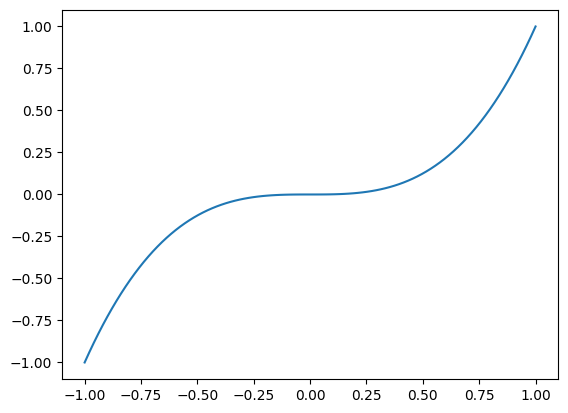

In [9]:
# stwórzmy wektor
x_values = np.linspace(-1, 1, 100)
y_values = x_values ** 3
plt.plot(x_values, y_values)

Dodajmy liczbę 1 do wektora (wymiary się nie zgadzają)

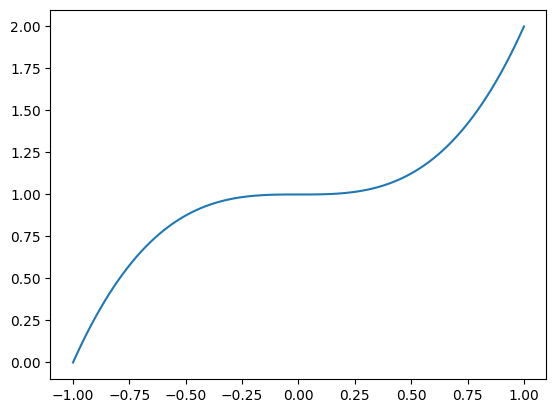

In [10]:
# Dodanie liczby do wektora
x_values = np.linspace(-1, 1, 100)
y_values = x_values ** 3 + 1
plt.plot(x_values, y_values)

Ale zaraz! Jak przyjrzymy się temu co tu się stało to zobaczymy, że 1 została dodana do każdego elementu naszego wektora. To co się stało to raczej coś takiego:

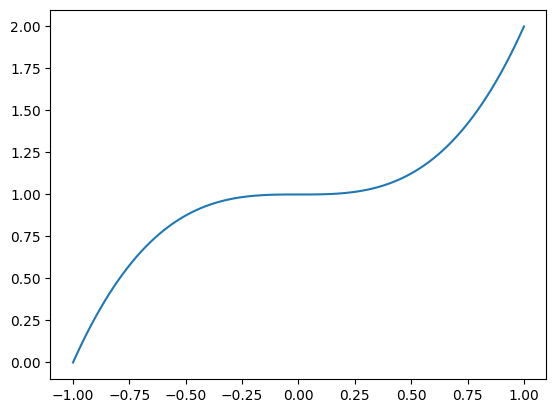

In [11]:
# Dodajemy wektor jedynek do wektora
x_values = np.linspace(-1, 1, 100)
y_values = x_values ** 3 + np.ones(x_values.size)
plt.plot(x_values, y_values)

Efekt ten sam. `numpy` zrobił coś pod maską. I to coś nazywamy właśnie `broadcastin`, czyli uzgodnienie wymiarów.

In [12]:
# Drugi przykład
np.arange(1, 4) * np.array([2])

array([2, 4, 6])

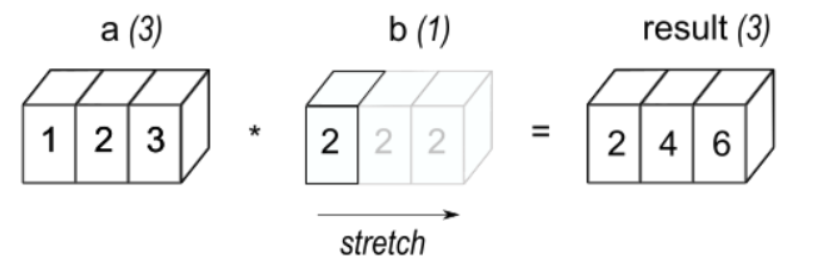

(źródło: https://numpy.org/doc/stable/user/basics.broadcasting.html)

Broadcasting zachodzi również w większej liczbie wymiarów.

In [13]:
# Mnożymy macierz jedynek 5x5 przez liczbę 7:
matrix_of_ones = np.ones((5, 5))
matrix_of_sevens = matrix_of_ones * 7
matrix_of_sevens

array([[7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.]])

To co tu się stało to raczej to:

In [14]:
# mnożymy macierz jedynek 5x5 przez macierz siódemek 5z5
matrix_of_ones * np.array((
    [7, 7, 7, 7, 7], 
    [7, 7, 7, 7, 7], 
    [7, 7, 7, 7, 7], 
    [7, 7, 7, 7, 7], 
    [7, 7, 7, 7, 7]
))

array([[7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.]])

To są podstawowe, najprostsze przykłady broadcastingu. Istnieją oczywiście bardziej złożone przykłady uzgadniania wymiarów, w który `numpy` z powodzeniem uzgadnia wymiary dwóch macierzy.

In [15]:
# Spróbujmy dodać macierz 4x3 i wektor o długości 3
np.array(
    [
        [0, 0, 0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]
    ]
) + np.array(
    [1, 2, 3]
)

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

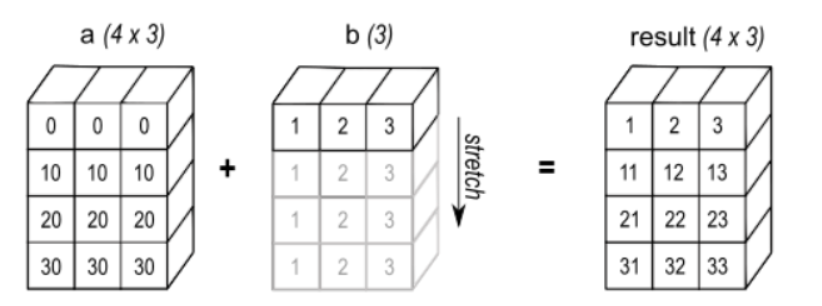

(źródło: https://numpy.org/doc/stable/user/basics.broadcasting.html)

Ok, widzimy że `numpy` pod maską rozciągnął wektor na wszystkie wiersze macierzy. Ale dlaczego nie na wszystkie kolumny? Przecież to też byłoby możliwe (kolumn też jest 5).

Na pewno też nie wszystko jest możliwe. Popatrzmy na przykład, w którym próba uzgodnienia wymiarów skończy się błędem.

In [16]:
# Przykład dodania do siebie macierzy i wektora, który kończy się niepowodzeniem
np.array(
    [
        [0, 0, 0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]
    ]
) + np.array(
    [1, 2, 3, 4]
)

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

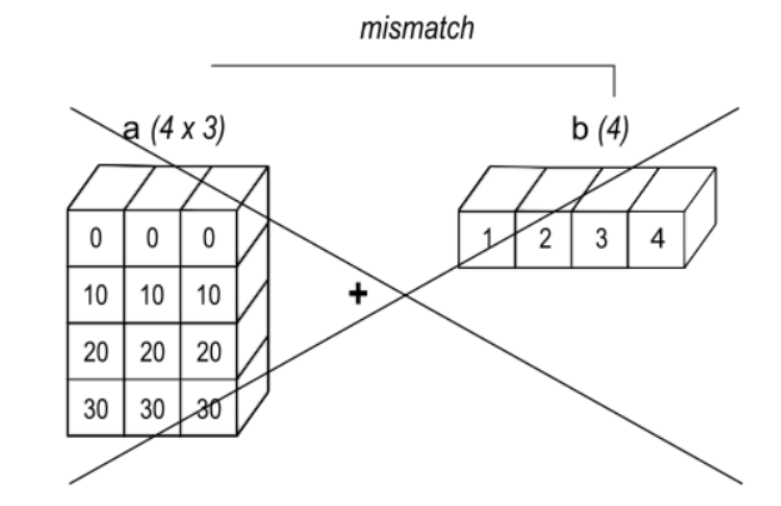

(źródło: https://numpy.org/doc/stable/user/basics.broadcasting.html)

Jeszcze jedna wizualizacja

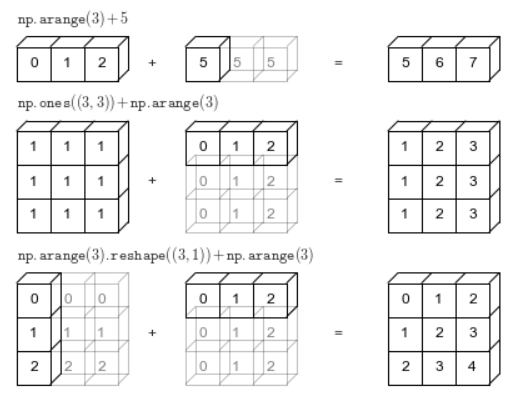

(źródło: https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

Pojawiają się pytania:

- Kiedy broadcasting jest możliwy ?
- W jakim kierunku zachodzi broadcasting ?

### Reguły broadcastingu

Popatrzmy na konkretny przypadek

In [18]:
# Pozytywny przykład boradcasting
matrix = np.zeros((3, 7)) # (3, 7)  3 wiersze, 7 kolumn
vector = np.arange(1, 8) # (7,)   # 1 wiersz, 7 kolumn (7-elementowy wektor)

print("Our Matrix: \n", matrix)
print("\nOur Vector: \n", vector)

Our Matrix: 
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

Our Vector: 
 [1 2 3 4 5 6 7]


Czy możemy dodać macierz do wektora ?

(3, 7) + (7, )

##### Reguła I
Etap paddingu (dodawanie jedynek jako nowe wymiary, aż do wyrównania liczby wymiarów obu tablic.

$(3, 7)$ - większy zostaje jaki jest

$(7, ) \rightarrow (1, 7)$ - mniejszy dostaje jedynki w nowych wymiarach (idąc od lewej) aż do wyrównania liczby wymiarów

##### Reguła II
Etap porównania (porównujemy długości odpowiadających sobie wymiarów idąc od prawej - braodcasting możliwy tylko jeżeli długości są sobie równe lub jedna z długości wynosi 1)

(3, 7) ? (1, 7)

$7 = 7$ - idziemy dalej

$3 != 1$ - ale jeden z wymiarów ma długość 1 więc idziemy dalej

Koniec. Czyli możemy!

In [19]:
# Udana próba dodania macierzy do wektora
print(matrix + vector)

[[1. 2. 3. 4. 5. 6. 7.]
 [1. 2. 3. 4. 5. 6. 7.]
 [1. 2. 3. 4. 5. 6. 7.]]


Teraz popatrzmy na przykład, który nie zadziała

In [21]:
# Negatywny przykład broadcastingu
matrix = np.zeros((3, 8)) # (3, 8) -> (3, 8)
vector = np.arange(1, 13) #  (12,) -> (1, 12)

##### Etap paddingu

$(3, 8)$ - większy zostaje jaki jest

$(12, ) \rightarrow (1, 12)$ - mniejeszy dostaje jedynki od lewej 

##### Etap porównania

(3, 8) ? (1, 12)

$8 != 12$ nie są sobie równe i żadne z nich nie jest równe 1

Broadcasting w tym przypadku nie jest możliwy. W przypadku takiej próby `numpy` rzuci wyjątek `ValueError`

In [22]:
# Nieudana próba dodania macierzy do wektora
print(matrix + vector)  # Zostanie rzucony wyjątek

ValueError: operands could not be broadcast together with shapes (3,8) (12,) 

Jeszcze jeden przykład.

Czasami broadcasting nie działa, ale przypadek może wydawać się możliwy do zrealizowania.

In [23]:
# Przykład broadcastingu, który mógłby działać, ale nie działa (bo nie spełnia reguł, które umówiliśmy)
matrix = np.zeros((7, 3)) # (7, 3) <- (7, 3)
vector = np.arange(1, 8) #    (7,) <- (1, 7)

print("This is the matrix: ", matrix)
print("This is the vector: ", vector)

matrix + vector  # tutaj zostanie podniesiony wyjątek

This is the matrix:  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
This is the vector:  [1 2 3 4 5 6 7]


ValueError: operands could not be broadcast together with shapes (7,3) (7,) 

Dlaczego mógłby działać ?

W zasadzie ten wektor mógłby zostać potraktowany jako wektor kolumnowy i wtedy moglibyśmy go dodać do poszczególnych kolumn.

Dlaczego nie działa ?

Problem jest na etapie porównania

(7, 3) ? (1, 7)

$7 != 3$ - nie są równe i żadne z nich nie jest równe zero.

Dlaczego etap porównania nie przechodzi ? Bo na etapie paddingu 1 dodaliśmy z lewej strony. A wektor kolumnowy 1 ma z prawej strony.

Przypomnijmy sobie jak zrobić z naszego wektora wektor kolumnowy.

In [24]:
# Dodanie nowego wymiaru do wektora
vector = vector[:, np.newaxis]
vector.shape

(7, 1)

In [25]:
# I dodajemy
matrix + vector

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.],
       [5., 5., 5.],
       [6., 6., 6.],
       [7., 7., 7.]])

### Indeksowanie

#### Wstęp

W `numpy` mamy do dyspozycji jeszcze dwa inne sposoby indeksowania, które nazywane są indeksowanie zaawansowanym (*ang. advances indexing aka fancy indexing*).

Zaraz omówimy zaawansowane indeksowanie, ale najpierw przypomnijmy sobie jeszcze szatkowanie.

### Szatkowanie 1D i 2D

In [26]:
# Szatkowanie wektora
vector = np.arange(10)
vector[3:7:2]  # start:stop:step

array([3, 5])

In [27]:
# Generujemy macierz
matrix = np.arange(25).reshape(5, 5)
matrix 

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [28]:
# Szatkowanie macierzy
# [[0 1]
# [5 6]]
upper_2x2_corner = matrix[:2, :2]  # 2 first rows, 2 first columns
print(upper_2x2_corner)

[[0 1]
 [5 6]]


In [38]:
# Szatkowanie macierzy
# [[18 19]
# [23 24]]
lower_2x2_corner = matrix[3:, 3:]  # 3 last rows, 3 last columns
print(lower_2x2_corner)

[[18 19]
 [23 24]]


In [36]:
# Szatkowanie macierzy
# [[17, 18, 19],
# [22, 23, 24]]
matrix[-2:, -3:]

array([[17, 18, 19],
       [22, 23, 24]])

In [37]:
# Szatkowanie macierzy - nieparzyste kolumny
matrix[:, 1::2]

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [31]:
# Szatkowanie macierzy - co drugi element 
every_second_entry = matrix[::2, ::2]  
every_second_entry

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

#### Zadanie (szatkowanie macierzy)

Wyświetl następujące podmacierze macierzy `my_matrix`:
- co drugi wiersz (pierwszy i trzeci wiersz)
- co druga kolumna (pierwsza i trzecia kolumna) w odwróconej kolejności

In [33]:
# Import numpy
import numpy as np

# Definicja macierzy `my_matrix`
my_matrix = np.array([[1, 4, 5], [10, 13, 9], [10, 8, 5]])

# Co drugi wiersz
every_second_row = my_matrix[::2, :]

# Co druga kolumna w odwróconej kolejności
every_second_column_reversed = my_matrix[:, ::-1]

### Zaawansowane indeksowanie

W powyższy sposób nie możemy otrzymać dowolnej podmacierzy.

Wyobraźmy sobie, że chcemy podmacierz złożoną ze wszystkich kolumn i wierszy 1, 3, 4. Krok w tym przypadku nic nam nie pomoże, bo nie jest stały. Ale w `numpy` mamy jeszcze dwa inne sposoby indeksowania:

- indeksowanie za pomocą listy (*ang. list indexing*)
- indeksowanie za pomocą tablicy boolean (*ang. boolean indexing*)

In [39]:
# Przypomnijmy jak wygląda nasza macierz
matrix

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

##### Indeksowanie za pomocą listy

In [40]:
# Pierwszy, czwary, piąty i siódmy element wektora
vector = np.arange(10, 20)
vector[[0, 3, 4, 6]]

array([10, 13, 14, 16])

In [41]:
# Pierwszy, drugi i piąty wiersz macierzy
matrix[[0, 1, 4], :]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24]])

In [42]:
# Pierwsza, trzecia i czwarta kolumna
matrix[:, [0, 2, 3]]

array([[ 0,  2,  3],
       [ 5,  7,  8],
       [10, 12, 13],
       [15, 17, 18],
       [20, 22, 23]])

In [43]:
# Trzy pierwsze elementy diagonali
matrix[[0, 1, 2], [0, 1, 2]]

array([ 0,  6, 12])

Indeksowanie za pomocą list możemy łączyć z poznanymi wcześniej sposobami indeksowania

In [44]:
# pierwsz trzecia i czwarta kolumna, parzystych wierszy
matrix[::2, [0, 1, 2]]

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

#### Indeksowanie za pomocą tablic boolean

Indeksowanie za pomocą tablic boolean jest jednym z najlepszych przykładów zastosowania poznanych w poprzedniej części tablic boolean. Tablica boolean może pełnić funkcje maski/filtra.

Przypomnijmy sobie w jaki sposób otrzymujemy tablicę boolean.

In [45]:
# Zapytanie generujące tablicę boolean
matrix > 15

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [46]:
# wykorzystanie tablicy boolean w roli maski
matrix[matrix > 15] # takie indeksowanie zwraca tylko te elementy, które w masce miały wartość `True`

array([16, 17, 18, 19, 20, 21, 22, 23, 24])

Takie indeksowanie zwraca tylko te elementy, które w masce miały wartość `True`

Zapytania możemy ze sobą łączyć za pomocą operatów `&` (and) i `|` (or).

In [47]:
# Przykład użycia operatora &
(matrix > 15) & (matrix <= 20)

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True, False, False, False, False]])

In [48]:
# Przykład użycia operatora |
(matrix < 7) | (matrix >= 14)

array([[ True,  True,  True,  True,  True],
       [ True,  True, False, False, False],
       [False, False, False, False,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

W przypadku tworzenia złożnych zapytań musimy pamiętać o zamknięciu pojedynczych zapytań w nawiasy. Zapis bez użycia nawiasów wywoła błąd składni.

In [49]:
# zastosowanie złożonej maski z operatorem `&`
matrix[(matrix > 15) & (matrix <= 20)]

array([16, 17, 18, 19, 20])

In [50]:
# zastosowanie złożonej maski z operatorem `|`
matrix[(matrix < 7) | (matrix >= 14)] # Can ask to satisfy one of two conditions

array([ 0,  1,  2,  3,  4,  5,  6, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24])

#### Zadanie (boolean indexing)

Znajdź wszystkie parzyste i wszystkie nieparzyste elementy w macierzy (najprościej do tego celu użyć indeksowania za pomocą tablic boolean oraz zapytań z operatorem modulo).

In [51]:
# Import modułu numpy
import numpy as np

# Defnicja macierzy `my_matrix`
my_matrix = np.array([[1, 4, 5], [10, 13, 9], [10, 8, 5]])


# wszystkie elementy parzyste
even_numbers = my_matrix[my_matrix % 2 == 0]

# wszystkie elementy nieparzyste
odd_numbers = my_matrix[my_matrix % 2 != 0]